<a href="https://colab.research.google.com/github/mahdieslaminet/Machine_Vision_Colab_Based/blob/master/04-color-spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">فضاهای رنگی در OpenCV</div>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## More about RGB(or BGR) images

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


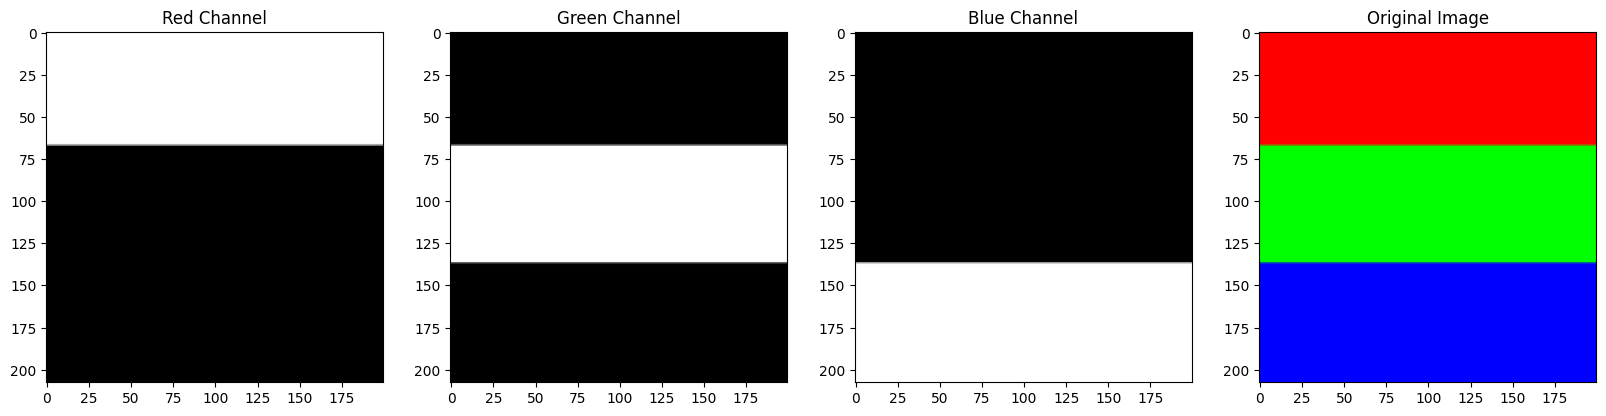

In [5]:
# Split the image into the B,G,R components
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# اتصال به Google Drive
drive.mount('/content/drive')

# مسیر فایل (لطفاً مسیر دقیق را جایگزین کنید)
image_path = '/content/drive/My Drive/images/color.png'

# خواندن تصویر
img = cv2.imread(image_path)

# بررسی اینکه تصویر به درستی خوانده شده باشد
if img is None:
    print("خطا در خواندن تصویر! مسیر فایل را بررسی کنید.")
else:
    # جدا کردن کانال‌های رنگی
    b, g, r = cv2.split(img)

    # نمایش کانال‌ها
    plt.figure(figsize=[20,5])
    plt.subplot(141); plt.imshow(r, cmap='gray'); plt.title("Red Channel")
    plt.subplot(142); plt.imshow(g, cmap='gray'); plt.title("Green Channel")
    plt.subplot(143); plt.imshow(b, cmap='gray'); plt.title("Blue Channel")

    # نمایش تصویر اصلی
    plt.subplot(144); plt.imshow(img[..., ::-1]); plt.title("Original Image")
    plt.show()


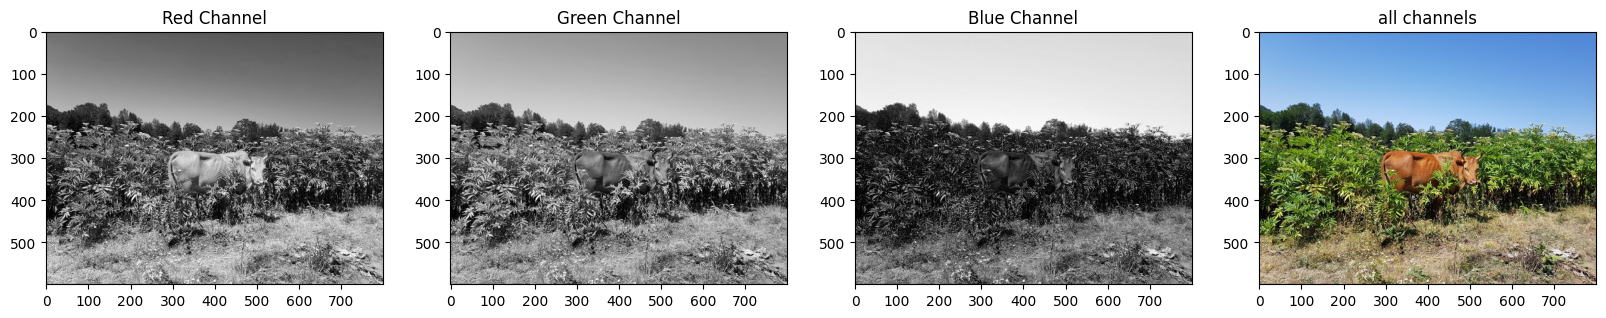

In [6]:
# Split the image into the B,G,R components
image_path = '/content/drive/My Drive/images/input.jpg'
img = cv2.imread(image_path)
b,g,r = cv2.split(img)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

# Show the original image
plt.subplot(144);plt.imshow(img[:,:,::-1]);plt.title("all channels");

### merge channels to form an image

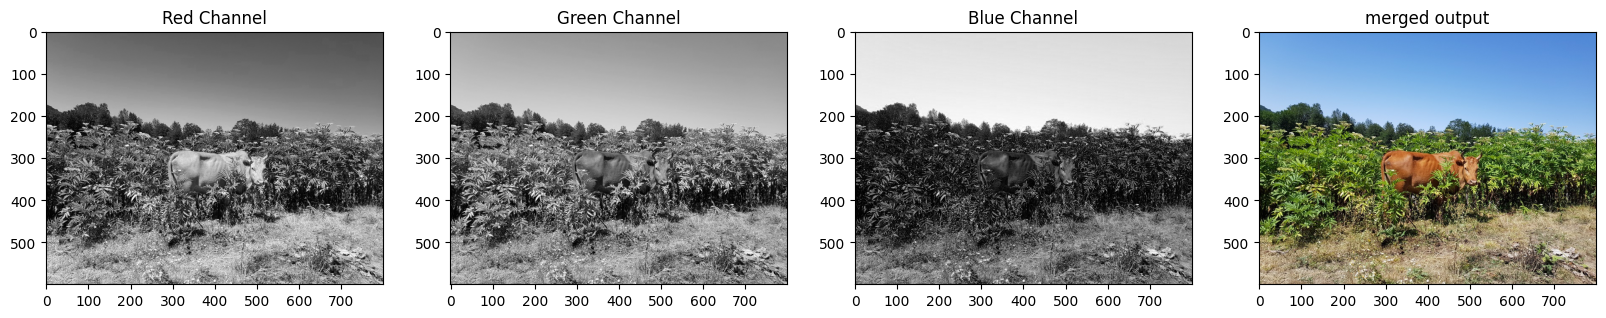

In [7]:
# Let's re-make the original image,
merged = cv2.merge([b, g, r])
# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

# Show the original image
plt.subplot(144);plt.imshow(merged[:,:,::-1]);plt.title("merged output");

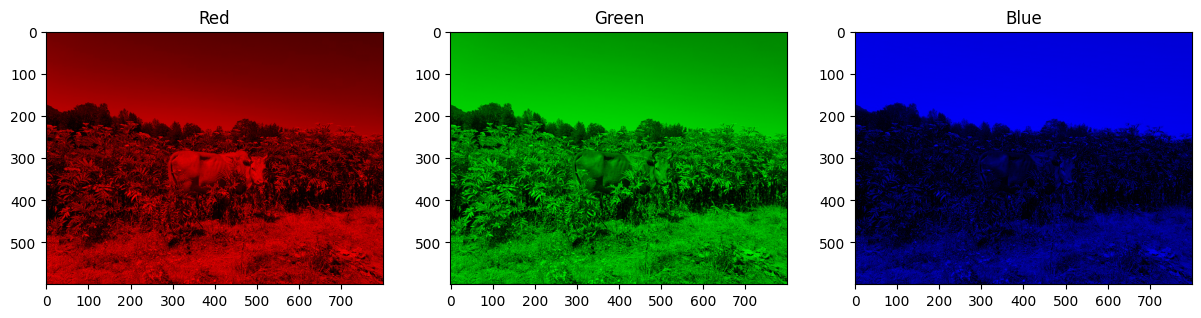

In [8]:
zeros = np.zeros_like(r, 'uint8')

red = cv2.merge([zeros, zeros, r])
green = cv2.merge([zeros, g, zeros])
blue = cv2.merge([b, zeros, zeros])

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(red[...,::-1],cmap='gray');plt.title("Red");
plt.subplot(142);plt.imshow(green[...,::-1],cmap='gray');plt.title("Green");
plt.subplot(143);plt.imshow(blue[...,::-1],cmap='gray');plt.title("Blue");



### Modifying individual Channel

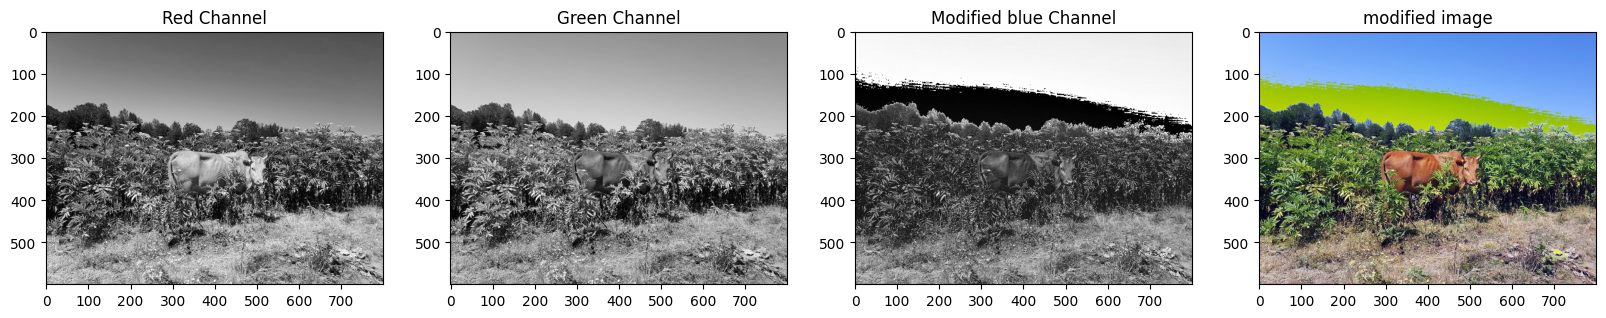

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Split the image into the B,G,R components
img = cv2.imread(image_path)
b,g,r = cv2.split(img)

# Let's re-make the original image,
modified_b = b+20
merged = cv2.merge([modified_b, g, r])
# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(modified_b,cmap='gray');plt.title("Modified blue Channel");

# Show the original image
plt.subplot(144);plt.imshow(merged[:,:,::-1]);plt.title("modified image");

can you guess what is the problem?!

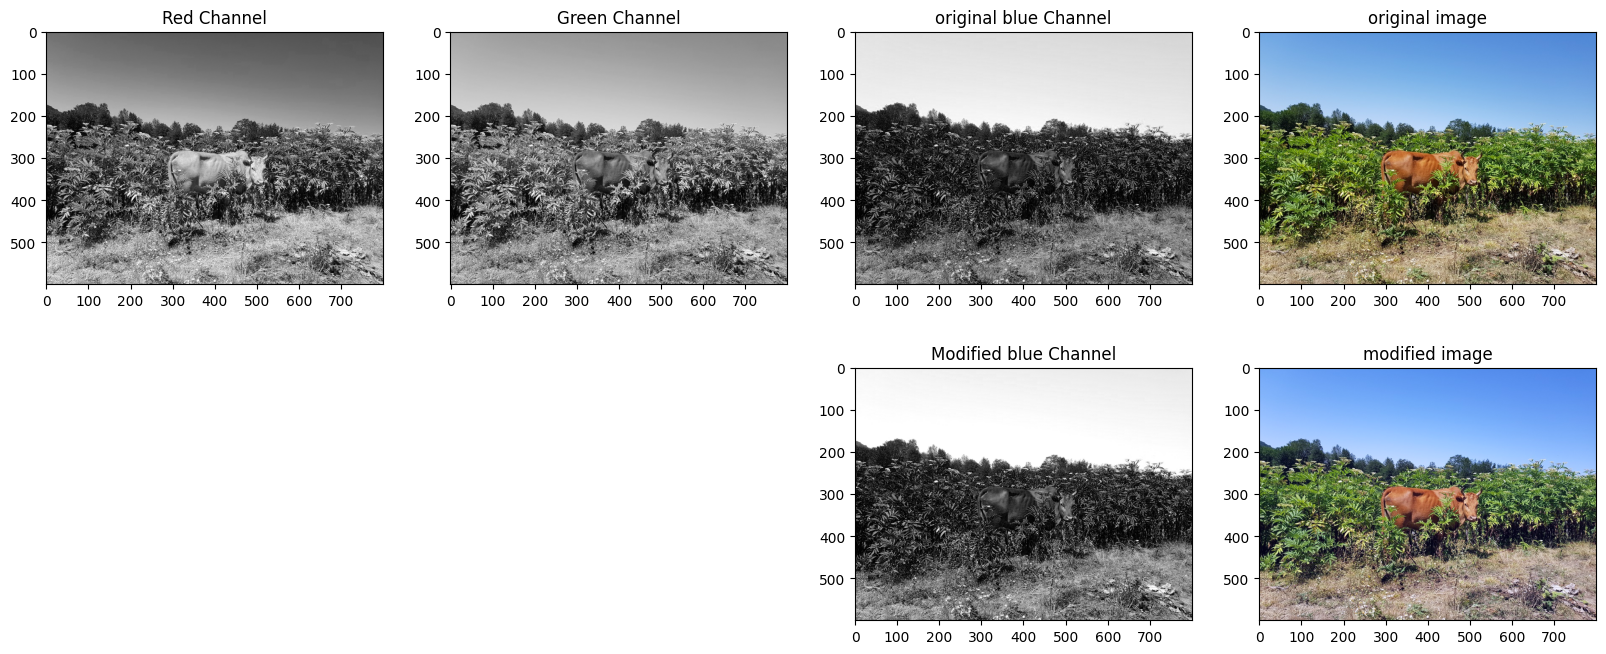

In [11]:
# Let's re-make the original image,
modified_b = b.astype('int16') + 20
modified_b = np.minimum(modified_b, 255)
modified_b = modified_b.astype('uint8')

merged = cv2.merge([modified_b, g, r])
# Show the channels
plt.figure(figsize=[20,8])
plt.subplot(241);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(242);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(243);plt.imshow(b,cmap='gray');plt.title("original blue Channel");
plt.subplot(244);plt.imshow(img[:,:,::-1]);plt.title("original image");

# Show the modified channel and image
plt.subplot(247);plt.imshow(modified_b,cmap='gray');plt.title("Modified blue Channel");
plt.subplot(248);plt.imshow(merged[:,:,::-1]);plt.title("modified image");


Better alternative (see [10-Arithmetic Operations](#) notebooks)

In [12]:
assert np.all(modified_b == cv2.add(b, 20))

### Another useful color space is HSV
<ul>
<li>Hue – Color Value (0 – 179)</li>
<li>Saturation – Vibrancy of color (0-255)</li>
<li>Value – Brightness or intensity (0-255)</li>
</ul>
<img src="https://github.com/mahdieslaminet/Machine_Vision_Colab_Based/blob/master/lecture_images/HSV_color_solid_cylinder.png?raw=1" />
Infact HSV is very useful in color filtering.

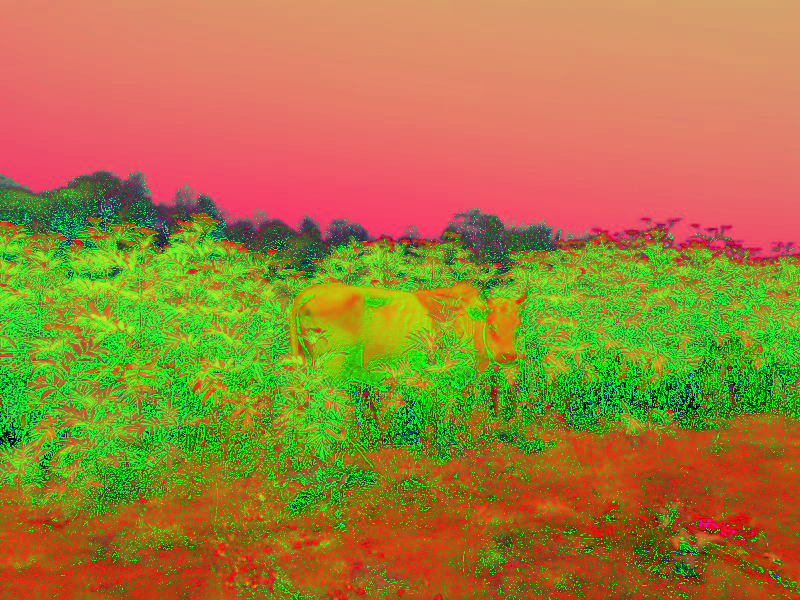

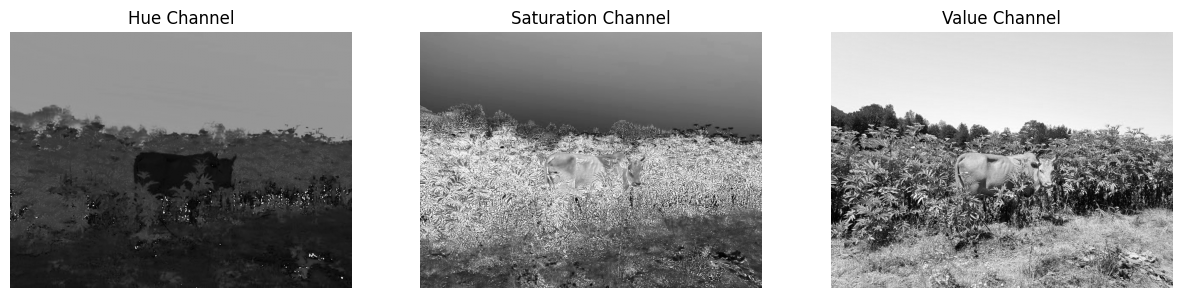

In [17]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # برای نمایش در Colab

# مسیر تصویر را متناسب با فایل خود تنظیم کنید
image_path = '/content/drive/My Drive/images/input.jpg'
img = cv2.imread(image_path)


# بررسی مقداردهی
if img is not None:
    # تبدیل تصویر به فضای رنگی HSV
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # نمایش کل تصویر HSV
    cv2_imshow(hsv_image)

    # نمایش کانال‌های مختلف HSV با استفاده از matplotlib
    channels = ['Hue', 'Saturation', 'Value']
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i in range(3):
        axes[i].imshow(hsv_image[:, :, i], cmap='gray')
        axes[i].set_title(f'{channels[i]} Channel')
        axes[i].axis("off")

    plt.show()
else:
    print("Error: Could not load the image. Check the path!")


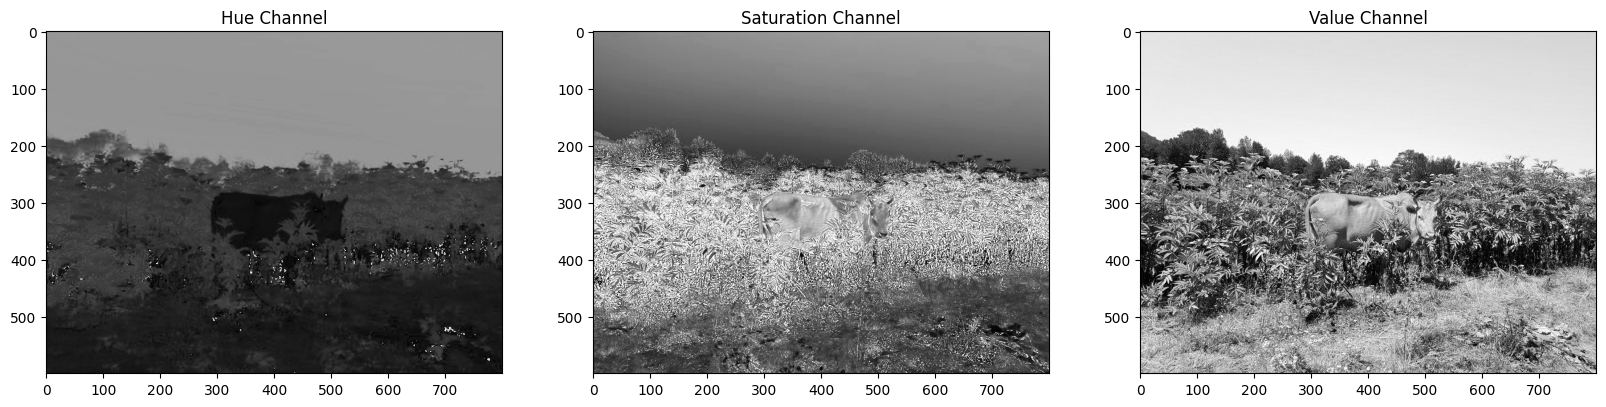

In [18]:
# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(131);plt.imshow(hsv_image[:, :, 0],cmap='gray');plt.title("Hue Channel");
plt.subplot(132);plt.imshow(hsv_image[:, :, 1],cmap='gray');plt.title("Saturation Channel");
plt.subplot(133);plt.imshow(hsv_image[:, :, 2],cmap='gray');plt.title("Value Channel");


Text(0.5, 1.0, 'original image')

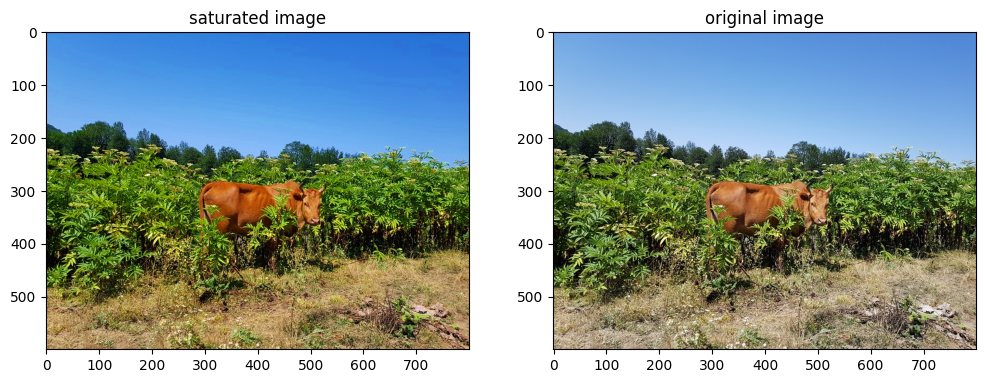

In [19]:
saturated_image = cv2.merge([hsv_image[:, :, 0], cv2.add(hsv_image[:, :, 1], 50), hsv_image[:, :, 2]])
saturated_image = cv2.cvtColor(saturated_image, cv2.COLOR_HSV2BGR)

plt.figure(figsize=[12,5])

plt.subplot(121)
plt.imshow(saturated_image[...,::-1])
plt.title('saturated image')

plt.subplot(122)
plt.imshow(img[...,::-1])
plt.title('original image')



Text(0.5, 1.0, 'original image')

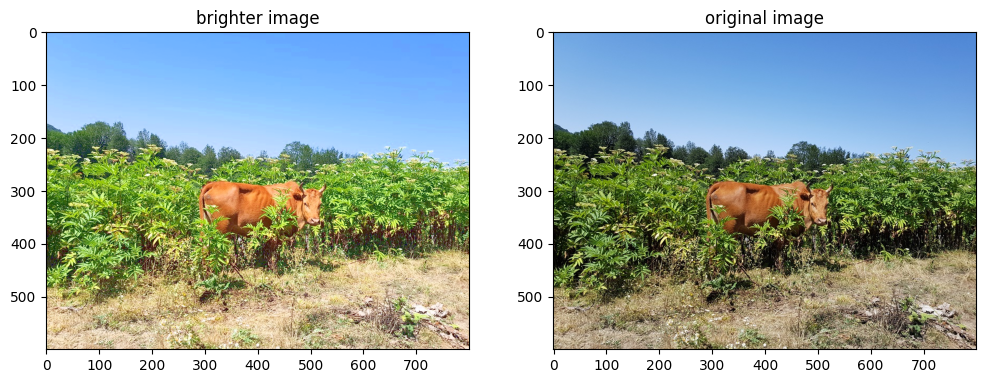

In [20]:
brighter_image = cv2.merge([hsv_image[:, :, 0], hsv_image[:, :, 1], cv2.add(hsv_image[:, :, 2], 50)])
brighter_image = cv2.cvtColor(brighter_image, cv2.COLOR_HSV2BGR)

plt.figure(figsize=[12,5])

plt.subplot(121)
plt.imshow(brighter_image[...,::-1])
plt.title('brighter image')

plt.subplot(122)
plt.imshow(img[...,::-1])
plt.title('original image')



#### You can view a list of color converisons here, but keep in mind you won't ever use or need many of these

https://docs.opencv.org/4.6.0/d8/d01/group__imgproc__color__conversions.html